In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#convert func with choosing in list which values from tuple
def convert_tuples(arr, indices):
    num_tuple_vals = len(eval(arr[0][0][0]))
    output = []
    for row in arr:
        new_row = []
        for tuple_str in row:
            tuple_vals = eval(tuple_str[0])
            new_row.append([tuple_vals[i] for i in indices])
        output.append(new_row)
    return np.array(output).reshape((len(arr),len(arr[0]), len(indices)))

In [ ]:
#prep data
def df_prep(df,val):
  label_encoder = LabelEncoder ()
  df["ADHD"]=label_encoder.fit_transform(df["ADHD"])
  y = df['ADHD']
  x = df.drop(['ADHD','gender'], axis = 1)
  x_train,  x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=111)
  x_train,y_train,x_test,y_test=np.array(x_train),np.array(y_train),np.array(x_test),np.array(y_test)
  x_train,x_test=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)),np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
  x_train,x_test=convert_tuples(x_train,val),convert_tuples(x_test,val)
  return x_train,y_train,x_test,y_test,label_encoder

In [ ]:
def df_prep_noSplit(df,val):
  label_encoder = LabelEncoder ()
  df["ADHD"]=label_encoder.fit_transform(df["ADHD"])
  y = df['ADHD']
  x = df.drop(['ADHD','gender'], axis = 1)
  x,y=np.array(x),np.array(y)
  x=np.reshape(x,(x.shape[0],x.shape[1],1))
  x=convert_tuples(x,val)
  return x,y,label_encoder

In [ ]:
def conf(x_test1,x_test2,y_test,model):
  y_pred = model.predict([x_test1,x_test2],verbose=0)
  pred_class_y=[]
  for i in range(y_pred.shape[0]):
    pred_class_y.append(np.argmax(y_pred[:][i]))
  pred_class_y=np.array(pred_class_y)
  pred_class_y=label_encoder.inverse_transform(pred_class_y)
  y_test=label_encoder.inverse_transform(y_test)
  target=["Positive","Negative"]

  plt.figure(figsize=(10,5
                      ))
  fx=sns.heatmap(confusion_matrix(y_test,pred_class_y), annot=True, fmt=".2f",cmap="GnBu")
  fx.set_title('Confusion Matrix \n');
  fx.set_xlabel('\n Actual Values \n')
  fx.set_ylabel('Predicted Values \n');
  fx.xaxis.set_ticklabels(target)
  fx.yaxis.set_ticklabels(target)
  plt.show()

In [ ]:
def conf2(y_test,y_pred):
  confusion_mat = confusion_matrix(y_test, y_pred)


  TP = confusion_mat[1, 1]
  TN = confusion_mat[0, 0]
  FP = confusion_mat[0, 1]
  FN = confusion_mat[1, 0]

  return TP, TN, FP, FN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler
from sklearn.utils import shuffle
from sklearn.utils import class_weight
from keras.layers import Dense, Dropout, Activation, Flatten ,LSTM,RepeatVector,TimeDistributed,MultiHeadAttention,Bidirectional,Input,Concatenate,GRU,Conv1D,BatchNormalization,LeakyReLU,MaxPool1D,GlobalAveragePooling1D,Dense,Dropout,AveragePooling1D
from tensorflow.keras.models import Model
from keras.optimizers import Adam
#from keras.layers import  Conv2D, MaxPooling2D
from keras.utils import to_categorical
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.backend import clear_session

#(('tanh', 'relu', or 'elu','sigmoid'))

In [ ]:
folder_path="/content/drive/MyDrive/TrainING/Group 1 (ADHD)/Dataset 3/tests_CSVs"


In [ ]:
files = os.listdir(folder_path)
filepaths=[]
for i in range(len(files)):
  filepath = os.path.join(folder_path, files[i])
  filepaths.append(filepath)
filepaths

['/content/drive/MyDrive/TrainING/Group 1 (ADHD)/Dataset 3/tests_CSVs/test_2.csv',
 '/content/drive/MyDrive/TrainING/Group 1 (ADHD)/Dataset 3/tests_CSVs/test_1.csv',
 '/content/drive/MyDrive/TrainING/Group 1 (ADHD)/Dataset 3/tests_CSVs/test_3.csv',
 '/content/drive/MyDrive/TrainING/Group 1 (ADHD)/Dataset 3/tests_CSVs/test_4.csv',
 '/content/drive/MyDrive/TrainING/Group 1 (ADHD)/Dataset 3/tests_CSVs/test_5.csv',
 '/content/drive/MyDrive/TrainING/Group 1 (ADHD)/Dataset 3/tests_CSVs/test_6.csv',
 '/content/drive/MyDrive/TrainING/Group 1 (ADHD)/Dataset 3/tests_CSVs/test_7.csv',
 '/content/drive/MyDrive/TrainING/Group 1 (ADHD)/Dataset 3/tests_CSVs/test_8.csv',
 '/content/drive/MyDrive/TrainING/Group 1 (ADHD)/Dataset 3/tests_CSVs/test_9.csv',
 '/content/drive/MyDrive/TrainING/Group 1 (ADHD)/Dataset 3/tests_CSVs/test_10.csv',
 '/content/drive/MyDrive/TrainING/Group 1 (ADHD)/Dataset 3/tests_CSVs/test_11.csv']

In [ ]:
files = os.listdir(folder_path)
dfs_dic = {}
for filename in files:
    # Check if the file is a CSV file
    if filename.endswith('.csv'):
        # Construct the full path to the file
        file_path = os.path.join(folder_path, filename)

        # Load the CSV file into a Pandas DataFrame
        df = pd.read_csv(file_path)
        df = df.iloc[:, 1:]

        # Store the DataFrame in the dictionary with the filename as the key
        dfs_dic[filename] = df

In [ ]:
#df of each test
df_1=dfs_dic[ 'test_1.csv']
df_2=dfs_dic[ 'test_2.csv']
df_3=dfs_dic[ 'test_3.csv']
df_4=dfs_dic[ 'test_4.csv']
df_5=dfs_dic[ 'test_5.csv']
df_6=dfs_dic[ 'test_6.csv']
df_7=dfs_dic[ 'test_7.csv']
df_8=dfs_dic[ 'test_8.csv']
df_9=dfs_dic[ 'test_9.csv']
df_10=dfs_dic[ 'test_10.csv']
df_11=dfs_dic[ 'test_11.csv']

In [ ]:
dfs=[]
dfs.append(df_1)
dfs.append(df_2)
dfs.append(df_3)
dfs.append(df_4)
dfs.append(df_5)
dfs.append(df_6)
dfs.append(df_7)
dfs.append(df_8)
dfs.append(df_9)
dfs.append(df_10)
dfs.append(df_11)

In [ ]:
df=dfs[3]
x_train1,y_train1,label_encoder=df_prep_noSplit(df,[0])
x_train2,y_train2,label_encoder2=df_prep_noSplit(df,[1])
x_train1.shape,y_train1.shape,x_train2.shape,y_train2.shape

((79, 11520, 1), (79,), (79, 11520, 1), (79,))

In [ ]:
df_t = pd.concat([dfs[-2], dfs[-1]])
df_t=df_t.reset_index(drop=True)
x1,y1,label_encoder3=df_prep_noSplit(df_t,[0])
x2,y2,label_encoder4=df_prep_noSplit(df_t,[1])

x1.shape,y1.shape,x2.shape,y2.shape

((158, 11520, 1), (158,), (158, 11520, 1), (158,))

In [ ]:
"""
# Check if multiple GPUs are available and use tf.distribute.MirroredStrategy
if tf.config.list_physical_devices('GPU'):
    strategy = tf.distribute.MirroredStrategy()
    print('Number of devices: {}'.format(strategy.num_replicas_in_sync))
else:
    strategy = tf.distribute.get_strategy()  # Default strategy for CPU or single GPU

with strategy.scope():
    # Inputs
    input1 = Input(shape=(x_train1.shape[1], x_train1.shape[2]))
    input2 = Input(shape=(x_train2.shape[1], x_train2.shape[2]))


from tensorflow.python.client import device_lib

devices = device_lib.list_local_devices()
gpus = [device.name for device in devices if device.device_type == 'GPU']
print("Available GPUs:", gpus)
"""

'\n# Check if multiple GPUs are available and use tf.distribute.MirroredStrategy\nif tf.config.list_physical_devices(\'GPU\'):\n    strategy = tf.distribute.MirroredStrategy()\n    print(\'Number of devices: {}\'.format(strategy.num_replicas_in_sync))\nelse:\n    strategy = tf.distribute.get_strategy()  # Default strategy for CPU or single GPU\n\nwith strategy.scope():\n    # Inputs\n    input1 = Input(shape=(x_train1.shape[1], x_train1.shape[2]))\n    input2 = Input(shape=(x_train2.shape[1], x_train2.shape[2]))\n\n\nfrom tensorflow.python.client import device_lib\n\ndevices = device_lib.list_local_devices()\ngpus = [device.name for device in devices if device.device_type == \'GPU\']\nprint("Available GPUs:", gpus)\n'

In [ ]:
def bi_lstm(input, ne ,d):
    bilstm1 = tf.keras.layers.Bidirectional(LSTM(ne, activation='tanh', return_sequences=True))(input)
    dropout1 = tf.keras.layers.Dropout(d)(bilstm1)
    bilstm2 = tf.keras.layers.Bidirectional(LSTM(ne, activation='tanh', return_sequences=True))(dropout1)
    model_output = tf.keras.layers.Dropout(d)(bilstm2)
    return model_output

In [ ]:
def lstm(input, ne ,d):
    lstm1 = tf.keras.layers.LSTM(ne, activation='tanh', return_sequences=True)(input)
    dropout1 = tf.keras.layers.Dropout(d)(lstm1)
    lstm2 = tf.keras.layers.LSTM(ne, activation='tanh', return_sequences=True)(dropout1)
    model_output = tf.keras.layers.Dropout(d)(lstm2)
    return model_output

In [ ]:
def gru(input, ne ,d):
    gru1 = tf.keras.layers.GRU(ne, activation='tanh', return_sequences=True, reset_after=True, recurrent_activation='sigmoid')(input)
    dropout1 = tf.keras.layers.Dropout(d)(gru1)
    gru2 = tf.keras.layers.GRU(ne, activation='tanh', return_sequences=True, reset_after=True, recurrent_activation='sigmoid')(dropout1)
    model_output = tf.keras.layers.Dropout(d)(gru2)
    return model_output

In [ ]:
def cnn(input, f , k, d):
    conv1 = tf.keras.layers.Conv1D(filters = f,kernel_size=k, activation='tanh')(input)
    conv2 = tf.keras.layers.Conv1D(filters = f,kernel_size=k, activation='tanh')(conv1)
    dropout1 = tf.keras.layers.Dropout(d)(conv2)
    maxpool1 = tf.keras.layers.MaxPooling1D(pool_size=2)(dropout1)
    conv3 = tf.keras.layers.Conv1D(filters = f,kernel_size=k, activation='tanh')(maxpool1)
    dropout2 = tf.keras.layers.Dropout(d)(conv3)
    maxpool2 = tf.keras.layers.MaxPooling1D(pool_size=2)(dropout2)
    flatten1 = tf.keras.layers.Flatten()(maxpool2)
    dense1 = tf.keras.layers.Dense(ne2, activation='tanh')(flatten1)
    dropout3 = tf.keras.layers.Dropout(d)(dense1)
    model_output = dropout3
    return model_output

In [ ]:
ne=50
ne2=120
lr=0.00001
d=0.2
f=80
k=15
def modeling(x_train1, x_train2, y_train, mod):

  # Inputs
  input1 = Input(shape=(x_train1.shape[1],x_train1.shape[2]))
  input2 = Input(shape=(x_train2.shape[1],x_train2.shape[2]))

  # Build models
  if mod == 'B_B':
    model1_output = bi_lstm(input1, ne, d)
    model2_output = bi_lstm(input2, ne ,d)
  elif mod == 'B_L':
    model1_output = bi_lstm(input1, ne ,d)
    model2_output = lstm(input2, ne ,d)
  elif mod == 'B_G':
    model1_output = bi_lstm(input1, ne ,d)
    model2_output = gru(input2, ne ,d)



  elif mod == 'L_L':
    model1_output = lstm(input1, ne ,d)
    model2_output = lstm(input2, ne ,d)
  elif mod == 'L_B':
    model1_output = lstm(input1, ne ,d)
    model2_output = bi_lstm(input2, ne ,d)
  elif mod == 'L_G':
    model1_output = lstm(input1, ne ,d)
    model2_output = gru(input2, ne ,d)


  elif mod == 'G_G':
    model1_output = gru(input1, ne ,d)
    model2_output = gru(input2, ne ,d)
  elif mod == 'G_B':
    model1_output = gru(input1, ne ,d)
    model2_output = bi_lstm(input2, ne ,d)
  elif mod == 'G_L':
    model1_output = gru(input1, ne ,d)
    model2_output = lstm(input2, ne ,d)





  # Merge models
  merged = tf.keras.layers.concatenate([model1_output, model2_output])

  # Add final layers
  merged_flat = tf.keras.layers.Flatten()(merged)
  out = tf.keras.layers.Dense(2, activation='softmax')(merged_flat)

  # Final model
  model = Model(inputs=[input1, input2], outputs=out)

  # Compile
  model.compile(optimizer=Adam(lr),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  #fit
  h=model.fit([x_train1, x_train2], y_train1,
    validation_split = 0.1,
    batch_size = 1,
    epochs = 15,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 5,restore_best_weights = True)],verbose=1)

  return model,h

# BI-lstm

In [ ]:
import time
s_time=time.time()

model_B_B, h_B_B =modeling(x_train1, x_train2, y_train1, 'B_B')
model_B_L, h_B_L =modeling(x_train1, x_train2, y_train1, 'B_L')
model_B_G, h_B_G =modeling(x_train1, x_train2, y_train1, 'B_G')
#model4, h4 =modeling(x_train1,x_train2,y_train1, 'B_C')

model_L_L, h_L_L=modeling(x_train1, x_train2, y_train1, 'L_L')
model_L_B, h_L_B =modeling(x_train1, x_train2, y_train1, 'L_B')
model_L_G, h_L_G =modeling(x_train1, x_train2, y_train1, 'L_G')
#model8, h8 =modeling(x_train1,x_train2,y_train1, 'L_C')

model_G_G, h_G_G =modeling(x_train1, x_train2, y_train1, 'G_G')
model_G_B, h_G_B =modeling(x_train1, x_train2, y_train1, 'G_B')
model_G_L, h_G_L =modeling(x_train1, x_train2, y_train1, 'G_L')
#mode_l12, _h12 =modeling(x_train1,x_train2,y_train1, 'G_C')

model_C_C, h_C_C =modeling(x_train1, x_train2, y_train1, 'C_C')
#model14, h14 =modeling(x_train1,x_train2,y_train1, 'C_B')
#model15, h15 =modeling(x_train1,x_train2,y_train1, 'C_L')
#model16, h16 =modeling(x_train1,x_train2,y_train1, 'C_G')
e_time=time.time()

Epoch 1/15
71/71 [==============================] - 230s 3s/step - loss: 0.8183 - accuracy: 0.6197 - val_loss: 0.7115 - val_accuracy: 0.8750
Epoch 2/15
71/71 [==============================] - 192s 3s/step - loss: 0.1086 - accuracy: 0.9577 - val_loss: 1.7612 - val_accuracy: 0.6250
Epoch 3/15
71/71 [==============================] - 184s 3s/step - loss: 0.0215 - accuracy: 1.0000 - val_loss: 2.5389 - val_accuracy: 0.2500
Epoch 4/15
71/71 [==============================] - 191s 3s/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 2.1455 - val_accuracy: 0.5000
Epoch 5/15
71/71 [==============================] - 213s 3s/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 2.0989 - val_accuracy: 0.5000
Epoch 6/15
71/71 [==============================] - 162s 2s/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 2.0289 - val_accuracy: 0.5000
Epoch 1/15
71/71 [==============================] - 116s 2s/step - loss: 0.9814 - accuracy: 0.4930 - val_loss: 2.7448 - val_accuracy: 0.0000e+00
Epoch 2/1

In [ ]:
time=(e_time - s_time)/60/60
time

1.9360756174723306

# EV


In [ ]:
acc=[]
precision=[]
recall=[]
f1=[]
auroc=[]
TP, TN, FP, FN=[],[],[],[]

In [ ]:
def ev(model,x1,x2,y1,acc,precision,recall,f1,auroc,TP, TN, FP, FN):
  y_pred1=model.predict([x1,x2],verbose=0)
  y_pred=[]
  for i in range(y_pred1.shape[0]):
      y_pred.append(np.argmax(y_pred1[:][i]))
  y_pred=np.array(y_pred)
  TP_, TN_, FP_, FN_ = conf2(y1, y_pred)
  acc.append(accuracy_score(y1, y_pred) ); precision.append (precision_score(y1, y_pred)); recall.append(recall_score(y1, y_pred)); f1.append(f1_score(y1, y_pred)); auroc.append(roc_auc_score(y1, y_pred))
  TP.append(TP_)
  TN.append(TN_)
  FP.append(FP_)
  FN.append(FN_)
  return acc,precision,recall,f1,auroc,TP, TN, FP, FN

In [ ]:
acc,precision,recall,f1,auroc,TP, TN, FP, FN = ev(model_B_B,x1,x2,y1,acc,precision,recall,f1,auroc,TP, TN, FP, FN)
acc,precision,recall,f1,auroc,TP, TN, FP, FN = ev(model_B_L,x1,x2,y1,acc,precision,recall,f1,auroc,TP, TN, FP, FN)
acc,precision,recall,f1,auroc,TP, TN, FP, FN = ev(model_B_G,x1,x2,y1,acc,precision,recall,f1,auroc,TP, TN, FP, FN)
acc,precision,recall,f1,auroc,TP, TN, FP, FN = ev(model_L_L,x1,x2,y1,acc,precision,recall,f1,auroc,TP, TN, FP, FN)
acc,precision,recall,f1,auroc,TP, TN, FP, FN = ev(model_L_B,x1,x2,y1,acc,precision,recall,f1,auroc,TP, TN, FP, FN)
acc,precision,recall,f1,auroc,TP, TN, FP, FN = ev(model_L_G,x1,x2,y1,acc,precision,recall,f1,auroc,TP, TN, FP, FN)
acc,precision,recall,f1,auroc,TP, TN, FP, FN = ev(model_G_G,x1,x2,y1,acc,precision,recall,f1,auroc,TP, TN, FP, FN)
acc,precision,recall,f1,auroc,TP, TN, FP, FN = ev(model_G_B,x1,x2,y1,acc,precision,recall,f1,auroc,TP, TN, FP, FN)
acc,precision,recall,f1,auroc,TP, TN, FP, FN = ev(model_G_L,x1,x2,y1,acc,precision,recall,f1,auroc,TP, TN, FP, FN)
acc,precision,recall,f1,auroc,TP, TN, FP, FN = ev(model_C_C,x1,x2,y1,acc,precision,recall,f1,auroc,TP, TN, FP, FN)

# df_results

In [ ]:
models=['BI-LSTM_BI-LSTM','BI-LSTM_LSTM','BI-LSTM_GRU',
        'LSTM_LSTM','LSTM_BI-LSTM','LSTM_GRU',
        'GRU_GRU','GRU_BI-LSTM','GRU_LSTM',
        'CNN_CNN']
results=pd.DataFrame({'Models':models,'Accuracy':acc, 'Precision':precision,'Recall':recall,'F1':f1,'AURoc':auroc,'TP':TP, 'TN':TN, 'FP':FP, 'FN':FN })


In [ ]:
results

,Models,Accuracy,Precision,Recall,F1,AURoc,TP,TN,FP,FN
0,BI-LSTM_BI-LSTM,0.765823,0.877551,0.581081,0.699187,0.754826,43,78,6,31
1,BI-LSTM_LSTM,0.879747,0.823529,0.945946,0.880503,0.883687,70,69,15,4
2,BI-LSTM_GRU,0.746835,0.729730,0.729730,0.729730,0.745817,54,64,20,20
3,LSTM_LSTM,0.803797,0.759036,0.851351,0.802548,0.806628,63,64,20,11
4,LSTM_BI-LSTM,0.898734,0.837209,0.972973,0.900000,0.903153,72,70,14,2
5,LSTM_GRU,0.816456,0.835821,0.756757,0.794326,0.812902,56,73,11,18
6,GRU_GRU,0.702532,0.642105,0.824324,0.721893,0.709781,61,50,34,13
7,GRU_BI-LSTM,0.803797,0.830769,0.729730,0.776978,0.799389,54,73,11,20
8,GRU_LSTM,0.791139,0.735632,0.864865,0.795031,0.795528,64,61,23,10
9,CNN_CNN,0.734177,0.766667,0.621622,0.686567,0.727477,46,70,14,28


In [ ]:
results.to_csv("/content/drive/MyDrive/TrainING/NoteBOOks/results.csv")

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/TrainING/NoteBOOks/results.csv")

In [ ]:
df

,Unnamed: 0,Models,Accuracy,Precision,Recall,F1,AURoc,TP,TN,FP,FN
0,0,BI-LSTM_BI-LSTM,0.765823,0.877551,0.581081,0.699187,0.754826,43,78,6,31
1,1,BI-LSTM_LSTM,0.879747,0.823529,0.945946,0.880503,0.883687,70,69,15,4
2,2,BI-LSTM_GRU,0.746835,0.729730,0.729730,0.729730,0.745817,54,64,20,20
3,3,LSTM_LSTM,0.803797,0.759036,0.851351,0.802548,0.806628,63,64,20,11
4,4,LSTM_BI-LSTM,0.898734,0.837209,0.972973,0.900000,0.903153,72,70,14,2
5,5,LSTM_GRU,0.816456,0.835821,0.756757,0.794326,0.812902,56,73,11,18
6,6,GRU_GRU,0.702532,0.642105,0.824324,0.721893,0.709781,61,50,34,13
7,7,GRU_BI-LSTM,0.803797,0.830769,0.729730,0.776978,0.799389,54,73,11,20
8,8,GRU_LSTM,0.791139,0.735632,0.864865,0.795031,0.795528,64,61,23,10
9,9,CNN_CNN,0.734177,0.766667,0.621622,0.686567,0.727477,46,70,14,28


In [ ]:
cm =df.iloc[:, 1:2].join(df.iloc[:, -4:])

In [ ]:
cm

,Models,TP,TN,FP,FN
0,BI-LSTM_BI-LSTM,43,78,6,31
1,BI-LSTM_LSTM,70,69,15,4
2,BI-LSTM_GRU,54,64,20,20
3,LSTM_LSTM,63,64,20,11
4,LSTM_BI-LSTM,72,70,14,2
5,LSTM_GRU,56,73,11,18
6,GRU_GRU,61,50,34,13
7,GRU_BI-LSTM,54,73,11,20
8,GRU_LSTM,64,61,23,10
9,CNN_CNN,46,70,14,28


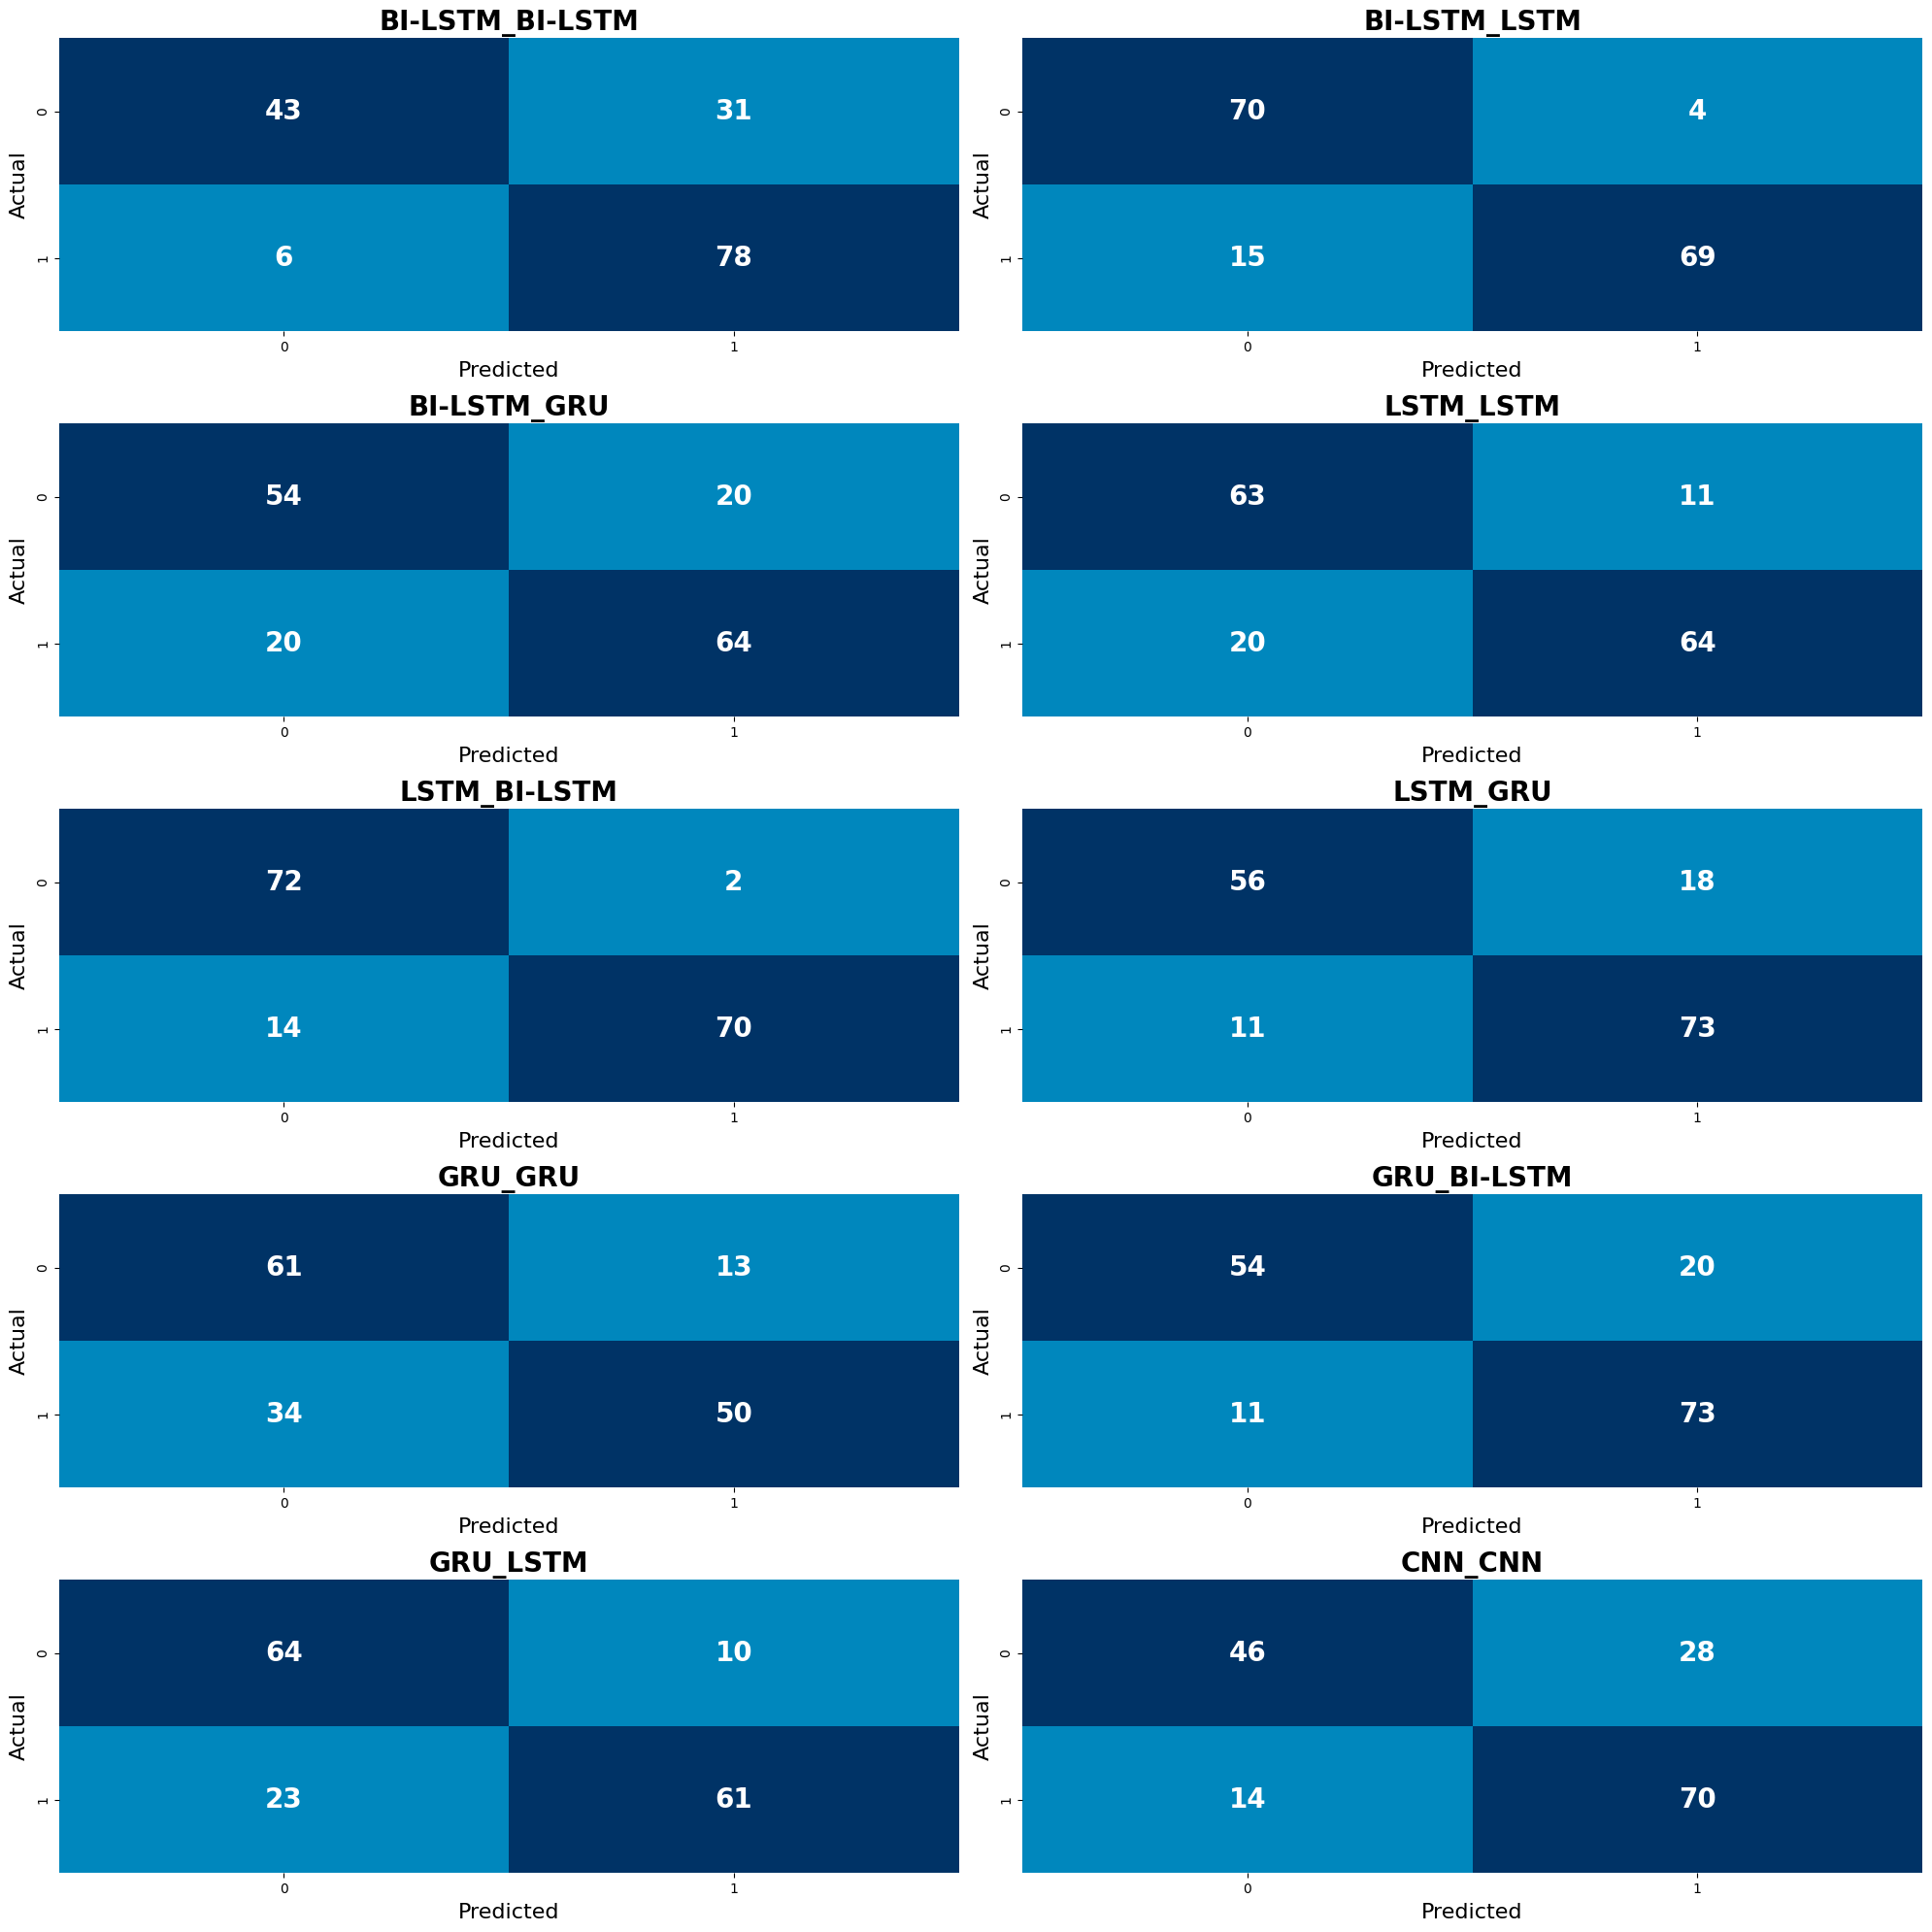

In [ ]:

#[1,0]
palette = sns.color_palette(['#0087BD','#003366'])
num_rows = 5
num_cols = int(np.ceil(len(cm) / num_rows))
fig, axes = plt.subplots(nrows = num_rows, ncols = num_cols, figsize=(20, 20))
for i in range(len(cm)):
    row = i // num_cols
    col = i % num_cols
    j = np.array([[cm['TP'][i], cm['FN'][i]], [cm['FP'][i], cm['TN'][i]]])
    ax = sns.heatmap(j, annot=True, fmt='d', cmap=palette, cbar=False, ax = axes[row, col], annot_kws={"size": 20, "weight": "bold"})
    ax.set_title(cm['Models'][i], fontsize=20, fontweight='bold')
    ax.set_xlabel('Predicted', fontsize=16,labelpad=5)
    ax.set_ylabel('Actual', fontsize=16,labelpad=5)
plt.tight_layout()

plt.show()

In [ ]:
models=['BI-LSTM','LSTM','GRU'];
cm=pd.DataFrame({'Models':models,'TP':[42,67,56], 'TN':[70,63,61], 'FP':[14,21,23], 'FN':[32,7,18] })

In [ ]:
cm

,Models,TP,TN,FP,FN
0,BI-LSTM,42,70,14,32
1,LSTM,67,63,21,7
2,GRU,56,61,23,18


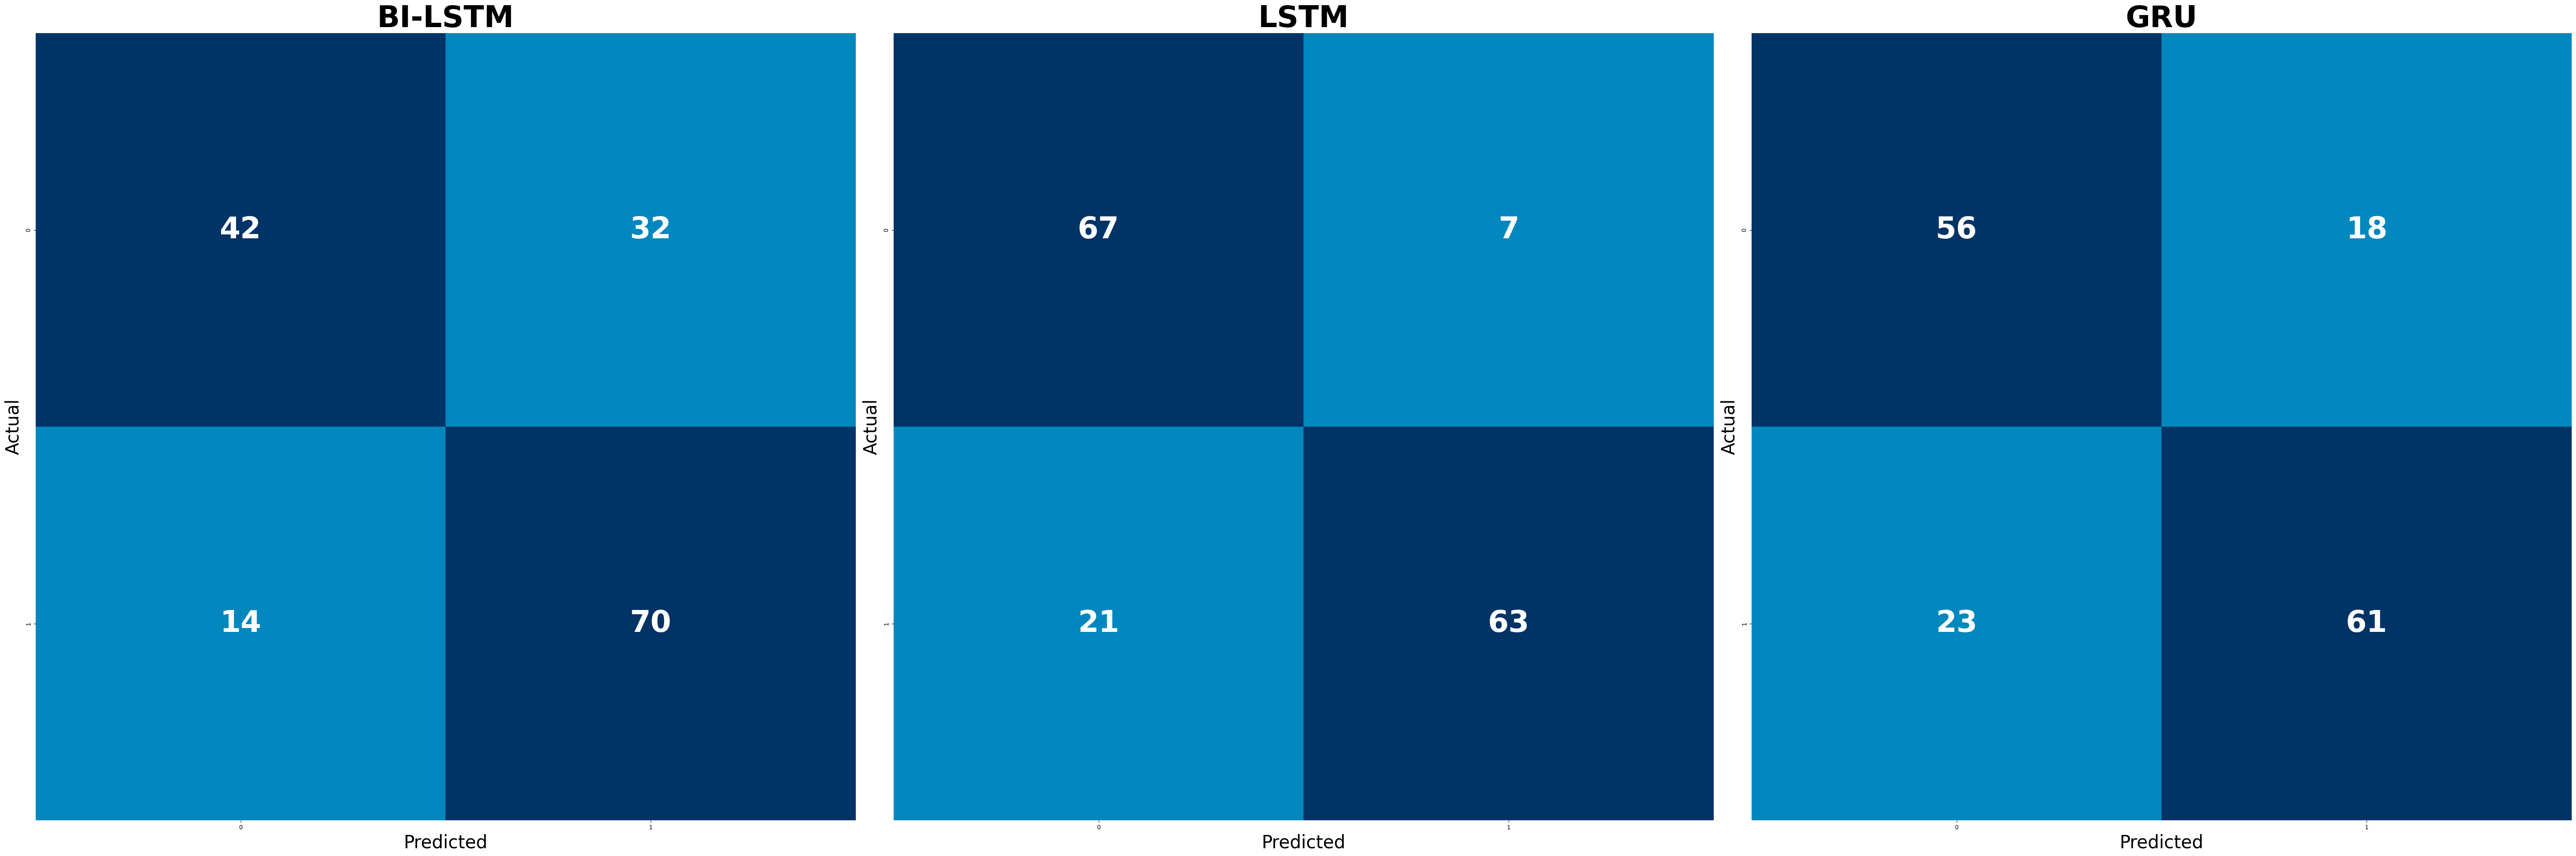

In [ ]:
palette = sns.color_palette(['#0087BD','#003366'])
num_rows = 1
num_cols = 3
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(60, 20))

for i in range(len(cm)):
    col = i % num_cols
    j = np.array([[cm['TP'][i], cm['FN'][i]], [cm['FP'][i], cm['TN'][i]]])
    ax = sns.heatmap(j, annot=True, fmt='d', cmap=palette, cbar=False, ax=axes[col], annot_kws={"size": 50, "weight": "bold"})
    ax.set_title(cm['Models'][i], fontsize=50, fontweight='bold')
    ax.set_xlabel('Predicted', fontsize=30, labelpad=5)
    ax.set_ylabel('Actual', fontsize=30, labelpad=5)

plt.tight_layout()
plt.show()